In [ ]:
# Week 6 Part 4, subpart 1
# Raster to NumPy Array Example 1 from https://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/rastertonumpyarray-function.htm
#
# Input file Boston_Band1_Clip.tif has 1 band

In [88]:
import arcpy
import numpy

# Get input Raster properties
inRas = arcpy.Raster('boston/Boston_Band1_Clip.tif')   # type(inRas) is arcpy.sa.Raster.Raster
lowerLeft = arcpy.Point(inRas.extent.XMin,inRas.extent.YMin) #type(lowerLeft) is arcpy.arcobjects.arcobjects.Point
#value of lowerLeft is <Point (301065.0, 4665675.0, #,#)>
cellSize = inRas.meanCellWidth #type(cellSize) is float, value is 30.0

# Convert Raster to numpy array
arr = arcpy.RasterToNumPyArray(inRas,nodata_to_value=0) #type(arr) is numpy.ndarray, arr.shape is (1632,1660)

In [113]:
# Calculate percentage of the row for each cell value
arrSum = arr.sum(1)  #type arrSum is numpy.ndarray, values in array are 8-digit integers
arrSum.shape = (arr.shape[0],1)   #value is (1632,1)
arrPerc = (arr)/arrSum #type(arrPerc) is numpy.ndarray, values in array are float values

# Convert Array to raster (keep the origin and cellsize the same as the input)
newRaster = arcpy.NumPyArrayToRaster(arrPerc,lowerLeft,cellSize,
                                     value_to_nodata=0)
# type(newRaster) is arcpy.sa.Raster.Raster
# need to put the output into a .gdb file, then can open it in ArcGIS Pro.
newRaster.save('boston/Default.gdb/BostonPercentRaster1')

In [104]:
# Compare what the different ndarrays look like
arr

array([[ 9959,  9913,  9911, ..., 10870, 11967, 10711],
       [ 9935,  9971,  9980, ..., 11413, 11355, 10472],
       [10026, 10056,  9980, ..., 10956, 10440, 10196],
       ...,
       [ 9989, 10006,  9998, ..., 10969, 10808, 10417],
       [ 9961, 10016, 10072, ..., 11090, 10925, 10887],
       [ 9971, 10048, 10092, ..., 10724, 10937, 10981]], dtype=uint16)

In [106]:
arrSum

array([[17390353],
       [17386302],
       [17405729],
       ...,
       [17436458],
       [17474914],
       [17473745]], dtype=uint32)

In [105]:
arrPerc

array([[0.00057267, 0.00057003, 0.00056991, ..., 0.00062506, 0.00068814,
        0.00061592],
       [0.00057143, 0.0005735 , 0.00057402, ..., 0.00065644, 0.0006531 ,
        0.00060231],
       [0.00057602, 0.00057774, 0.00057337, ..., 0.00062945, 0.0005998 ,
        0.00058578],
       ...,
       [0.00057288, 0.00057386, 0.0005734 , ..., 0.00062908, 0.00061985,
        0.00059743],
       [0.00057002, 0.00057316, 0.00057637, ..., 0.00063462, 0.00062518,
        0.00062301],
       [0.00057063, 0.00057503, 0.00057755, ..., 0.00061372, 0.00062591,
        0.00062843]])

In [122]:
# If I understand what this did, I think that if we sum up the values in each row, it should add up to 1
# Doesn't seem to exactly add up to 1
arrPercSum = arrPerc.sum(0)
arrPercSum

array([0.96318425, 0.96020877, 0.959542  , ..., 0.95866589, 0.95854587,
       0.95801447])

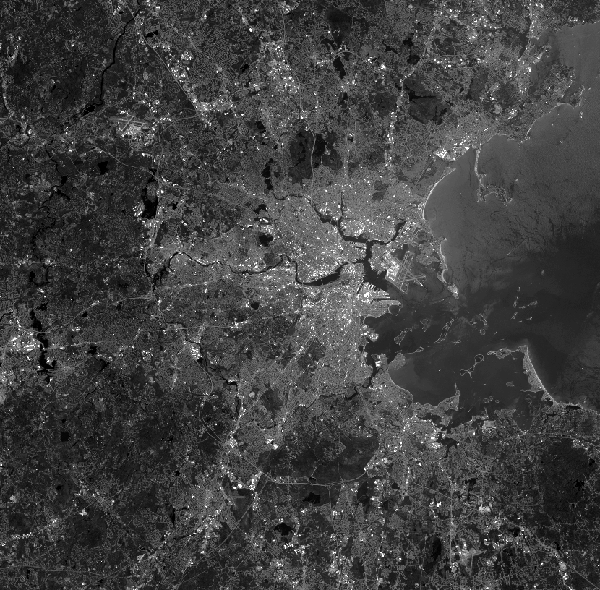

In [97]:
# This is the original raster file
inRas

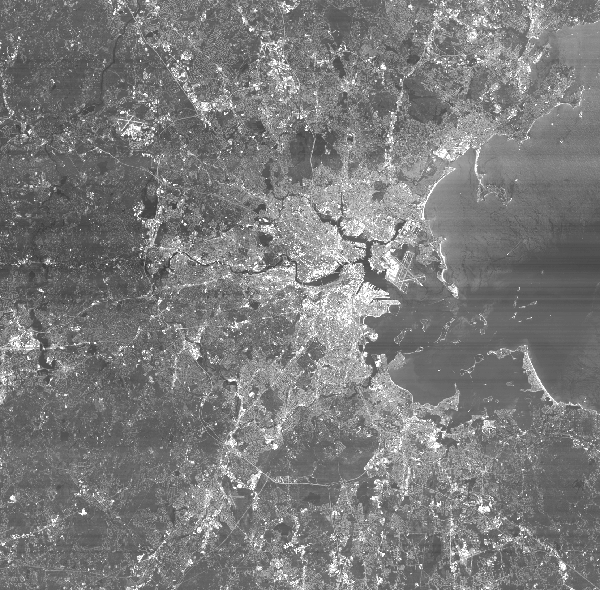

In [95]:
# displaying raster values as percent of total row value
newRaster